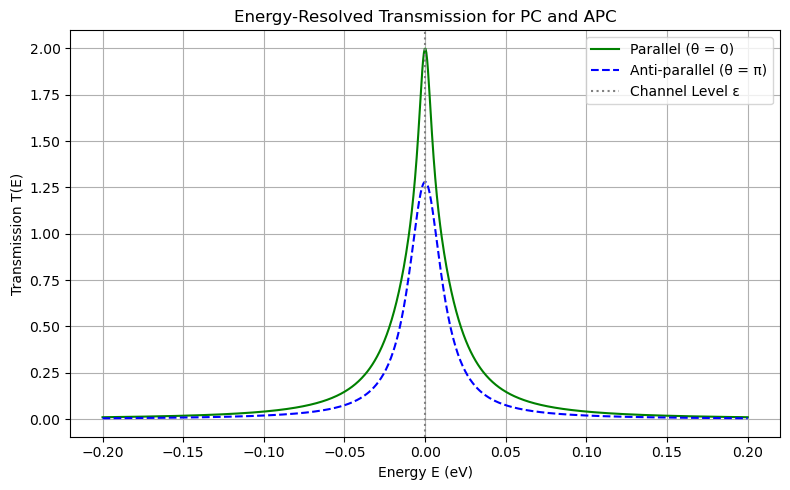

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# === Physical Parameters ===
epsilon = 0.0       # Onsite energy of the channel (eV)
eta = 1e-10          # Infinitesimal (eV)
alpha = 0.02        # Broadening for majority spin
beta  = 0.005       # Broadening for minority spin

identity = np.eye(2)                         # for hamiltonian

# === Define Gamma1 (fixed contact) ===
Gamma1 = np.array([[alpha, 0],
                   [0, beta]])

# === Define Gamma2 for parallel and anti-parallel ===
Gamma2_parallel = np.array([[alpha, 0],
                            [0, beta]])

Gamma2_antiparallel = np.array([[beta, 0],
                                [0, alpha]])

# === Energy Sweep ===
E_vals = np.linspace(-0.2, 0.2, 800)
T_parallel_vals = []
T_antiparallel_vals = []

for E in E_vals:
    Sigma1 = -0.5j * Gamma1

    # === Parallel Case ===
    Sigma2_p = -0.5j * Gamma2_parallel
    G_p = np.linalg.inv((E + 1j * eta) * identity - epsilon * identity - Sigma1 - Sigma2_p)
    T_p = np.real(np.trace(Gamma1 @ G_p @ Gamma2_parallel @ G_p.conj().T))
    T_parallel_vals.append(T_p)

    # === Anti-parallel Case ===
    Sigma2_ap = -0.5j * Gamma2_antiparallel
    G_ap = np.linalg.inv((E + 1j * eta) * identity - epsilon * identity - Sigma1 - Sigma2_ap)
    T_ap = np.real(np.trace(Gamma1 @ G_ap @ Gamma2_antiparallel @ G_ap.conj().T))
    T_antiparallel_vals.append(T_ap)

# === Plotting ===
plt.figure(figsize=(8, 5))
plt.plot(E_vals, T_parallel_vals, label="Parallel (θ = 0)", color='green')
plt.plot(E_vals, T_antiparallel_vals, label="Anti-parallel (θ = π)", color='blue', linestyle='--')
plt.axvline(epsilon, color='gray', linestyle=':', label="Channel Level ε")
plt.xlabel("Energy E (eV)")
plt.ylabel("Transmission T(E)")
plt.title("Energy-Resolved Transmission for PC and APC")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

          ^
          | z (fixed contact magnetization ↑)
          |
          |
          |     /
          |    /   ← free contact magnetization
          |   / θ
          |  /
          | /     (in xz-plane)
          |/
          o----------> x


         ↑                                  ↗ θ
      [Fixed] ────────────── ε ───────────── [Free]
      Contact (ẑ)                    Contact (rotated)


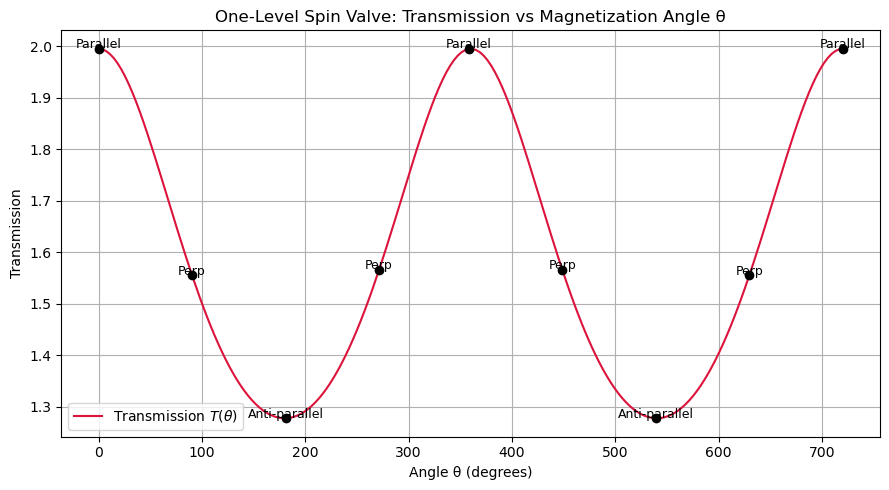

TMR = 56.11


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# === Physical & Model Parameters ===
epsilon = 0.0
E = 0.0
eta = 1e-5
alpha = 0.02
beta  = 0.005

P = (alpha - beta) / (alpha + beta)

# === Pauli Matrices ===
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
identity = np.eye(2)

# === Fixed Magnetic Contact ===
Gamma1 = np.array([[alpha, 0],
                   [0, beta]])

# === θ sweep ===
theta_vals = np.linspace(0, 4*np.pi, 200)
T_vals = []

for theta in theta_vals:
    n_dot_sigma = np.sin(theta) * sigma_x + np.cos(theta) * sigma_z
    Gamma2 = 0.5 * (alpha + beta) * (identity + P * n_dot_sigma)
    Sigma1 = -0.5j * Gamma1
    Sigma2 = -0.5j * Gamma2
    G = np.linalg.inv((E + 1j * eta) * identity - epsilon * identity - Sigma1 - Sigma2)
    T = np.real(np.trace(Gamma1 @ G @ Gamma2 @ G.conj().T))
    T_vals.append(T)

# === Identify key angles and transmission values ===
angle_deg = theta_vals * 180 / np.pi
key_angles = [0, 90, 180, 270, 360, 450, 540, 630,720]  # in degrees
key_labels = ['Parallel', 'Perp', 'Anti-parallel', 'Perp', 'Parallel', 'Perp', 'Anti-parallel', 'Perp','Parallel']

# Find closest index for each key angle
key_indices = [np.argmin(np.abs(angle_deg - a)) for a in key_angles]

# === Plotting ===
plt.figure(figsize=(9, 5))
plt.plot(angle_deg, T_vals, label="Transmission $T(\\theta)$", color="crimson")

# Add markers and labels for special points
for idx, label in zip(key_indices, key_labels):
    plt.plot(angle_deg[idx], T_vals[idx], 'ko')
    plt.text(angle_deg[idx], T_vals[idx] + 0.001, label, fontsize=9, ha='center')

plt.xlabel("Angle θ (degrees)")
plt.ylabel("Transmission")
plt.title("One-Level Spin Valve: Transmission vs Magnetization Angle θ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Calculate TMR ===
T_parallel = T_vals[key_indices[0]]        # θ = 0°
T_antiparallel = T_vals[key_indices[2]]    # θ = 180°

TMR =100* (T_parallel - T_antiparallel) / T_antiparallel
print(f"TMR = {TMR:.2f}")
